<a href="https://colab.research.google.com/github/JoeyAviles89z/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/3_19_Joey_Aviles_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

**Objectives**

- What are continuous and categorical variables? Using pandas built-in plotting functionality.
- Learn about various types of `pandas` plots using `matplotlib`
- use `matplotlib` to visualize distributions and relationships with continuous and categorical variables
- imitate a real-world example

**What are categorical, discrete, and continuous variables?**  

* Categorical variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. For example, categorical predictors include gender, material type, and payment method.  
* Discrete variables are numeric variables that have a countable number of values between any two values. A discrete variable is always numeric. For example, the number of customer complaints or the number of flaws or defects.  
* Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received.  
[Source](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)

In [0]:
# Your Work Here
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Continuous vs categorical variables**

In [0]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
ttn_df = pd.read_csv(url)
ttn_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
#cabin class is a categorical variable
#it can be displayed using either number or string values.
ttn_df['cabin_class'] = ttn_df['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})
ttn_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


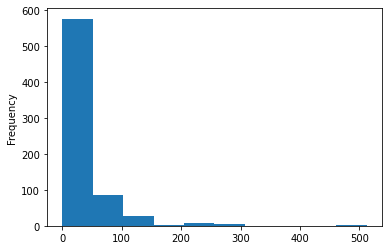

In [0]:
#Fare is a continuous variable, so we can display it with a histogram.
ttn_df['Fare'].plot(kind='hist');

In [0]:
#Remove two extreme outliers
ttn_df = ttn_df[ttn_df['Fare']<500]

In [0]:
#A continuous variable can be converted to a categorical var using binning.
farebins=[0, 8, 15, 33, 512]
farelabels=['low', 'medium', 'high', 'vhigh']
ttn_df['fare_groups']= pd.cut(ttn_df['Fare'], bins=farebins, labels=farelabels)
myresults = ttn_df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

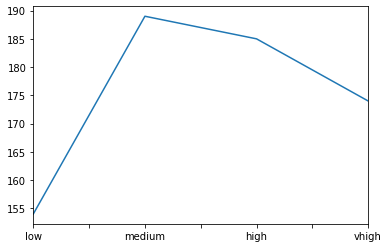

In [0]:
#Sometimes its important to specify the range of your y-axis to get more accurate results
myresults.plot();

**Display a single continuous variable**

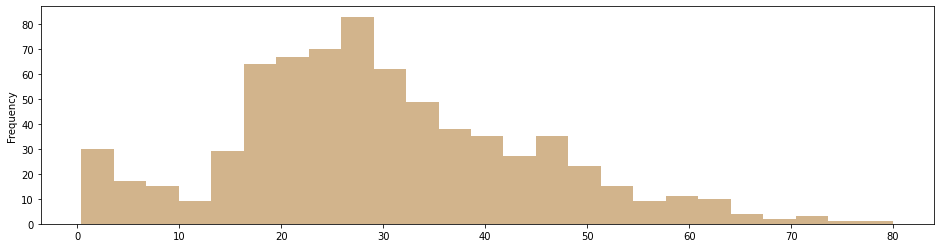

In [0]:
#Histogram
ttn_df['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='tan');

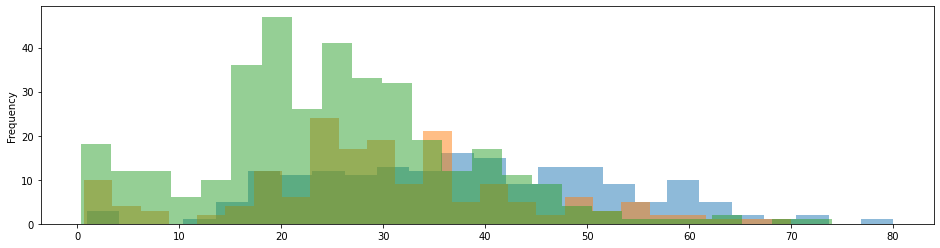

In [0]:
#Stacked Histogram of continuous variable, broken out by categorical variable
ttn_df[ttn_df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16, 4), alpha=0.5)
ttn_df[ttn_df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16, 4), alpha=0.5)
ttn_df[ttn_df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16, 4), alpha=0.5);


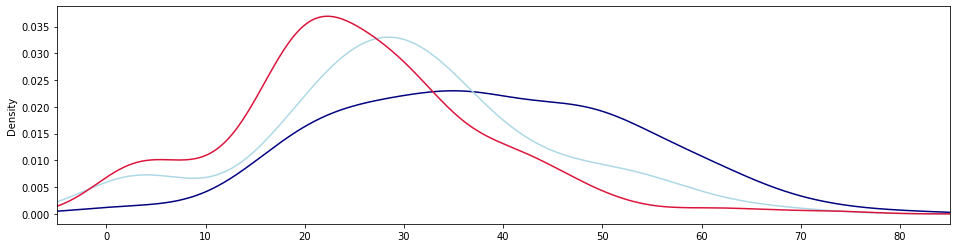

In [0]:
#But this is actually easier to read using a Kernel Density Estimate (KDE).
ttn_df[ttn_df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16, 4), color='navy')
ttn_df[ttn_df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16, 4), color='lightblue')
ttn_df[ttn_df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16, 4), color='crimson');

**Display a single categorical variable**

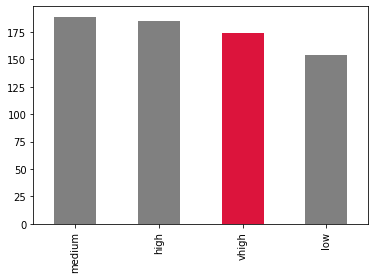

In [0]:
#Bar chart. Use colors to make a particular value 'pop'!
ttn_df['fare_groups'].value_counts().plot(kind='bar', color=['gray', 'gray', 'crimson', 'gray']);

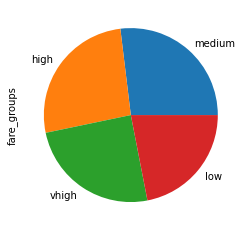

In [0]:
#Pie chart
ttn_df['fare_groups'].value_counts().plot(kind='pie', figsize=(4, 4));

**Compare two categorical variables**

In [0]:
#Compare two categorical variables using crosstab
cab_death = pd.crosstab(ttn_df['cabin_class'], ttn_df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


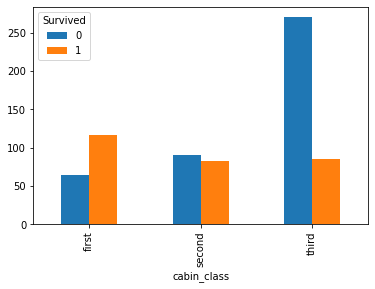

In [0]:
#Make that into a bar chart.
cab_death.plot(kind='bar');

In [0]:
#Crosstab with column percents.
cab_death1 = pd.crosstab(ttn_df['cabin_class'], ttn_df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


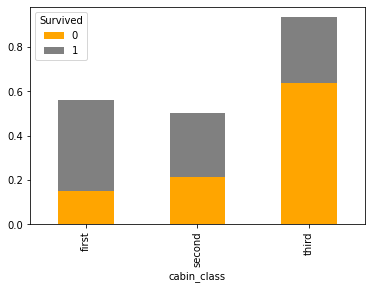

In [0]:
#Make a stacked bar chart, for easy comparison of two categorical variables
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [0]:
#Crosstab with column percents
cab_death2 = pd.crosstab(ttn_df['cabin_class'], ttn_df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


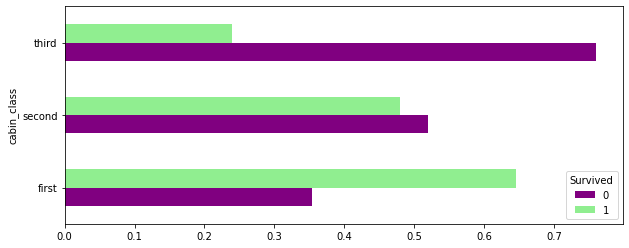

In [0]:
#A paried barchart for comparison of two categorical bariables. Note the use of 'barh'.
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10, 4));

Compare a categorical and continuous variable

In [0]:
#Lets look at a single continuous variable
ttn_df['Age'].mean()

29.618011283497882

In [0]:
#Now explore that continuous variable broken out by a categorical variable.
cab_age = ttn_df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

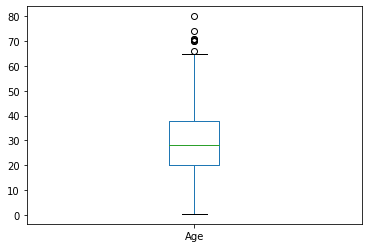

In [0]:
#To visualize a single continuous variable, you can just use '.plot' with 'kind=box'
ttn_df['Age'].plot(kind='box');

Compare two or three continuous variables

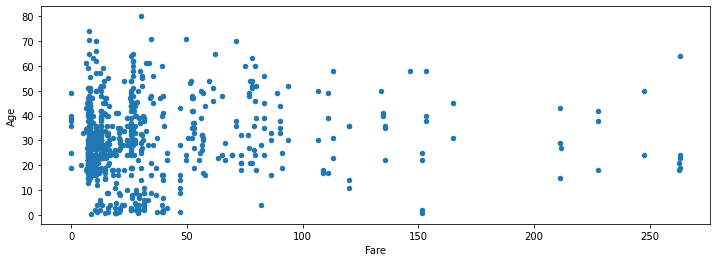

In [0]:
#Two continuous variables: age by fare
ttn_df.plot(kind = 'scatter', x='Fare', y='Age', figsize=(12, 4));

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

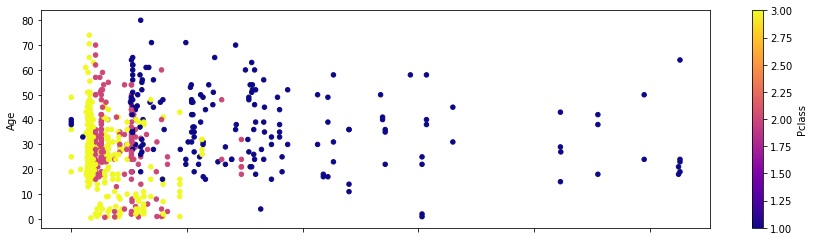

In [0]:
#Three variables: age, far, and cabin class (color can be either continuous or categorical)
ttn_df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15, 4));

Use a line plot to examine two continuous variables (often time)

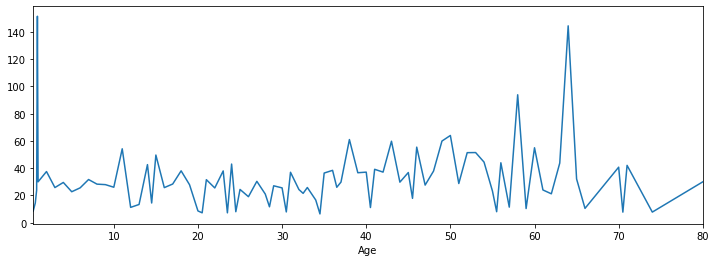

In [0]:
#line chart: age by fare
ttn_df.groupby('Age')['Fare'].mean().plot(figsize=(12, 4));

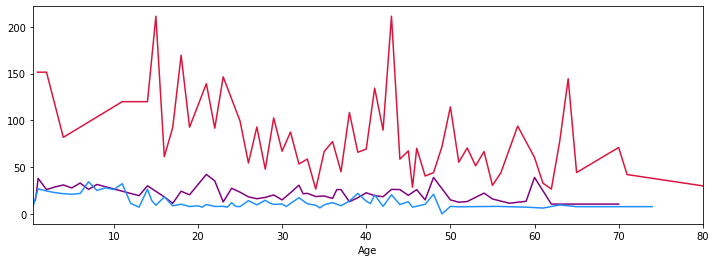

In [0]:
#Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
#Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [1, 2, 3]:
  ttn_df[ttn_df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12, 4), color=mycolors[x-1])

Compare multiple continuous variables

In [0]:
#Correlation Matrix
corr_matrix = ttn_df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


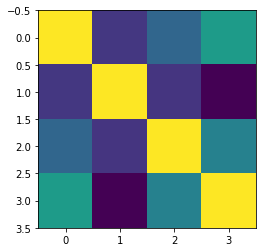

In [0]:
#Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

But this actually is easier and better looking if you use seaborn code.

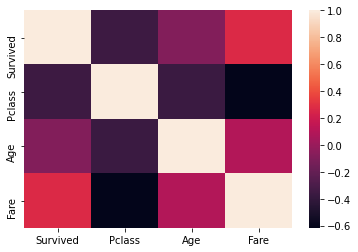

In [0]:
#More about seaborn further down.
sns.heatmap(corr_matrix);

## Intro to `matplotlib`

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x**2

In [0]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [0]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

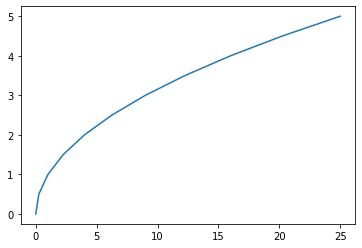

In [0]:
#Basic Matplotlib Commands
# a very simple plot, to get stared.
plt.plot(y, x)

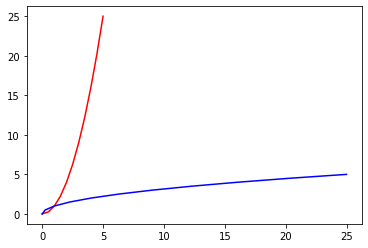

In [0]:
#You can have two 'plt' plots together (and let's add some color).
plt.plot(x, y, 'r')
plt.plot(y, x, 'b');

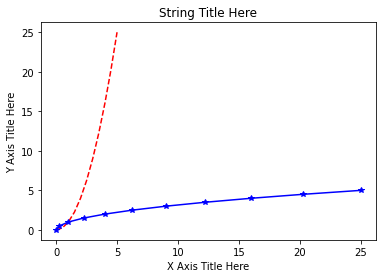

In [0]:
#Now add some labels, plus a little texture.
plt.plot(x, y, 'r--')
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

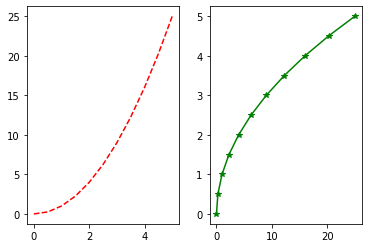

In [0]:
#Creating Multiplots on Same Canvas
#The basic syntax gores like this: plot.subplot(nrows, ncols, plot_number)
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')
plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*-');

# The .figure() method

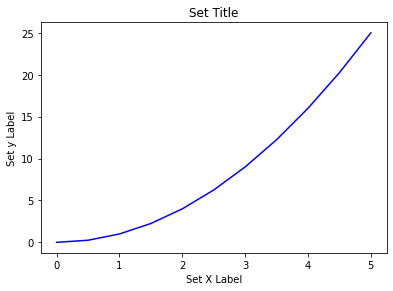

In [0]:
#Create Figure (empty canvas)
fig = plt.figure()

#Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label')
axes.set_ylabel('Set y Label')
axes.set_title('Set Title');

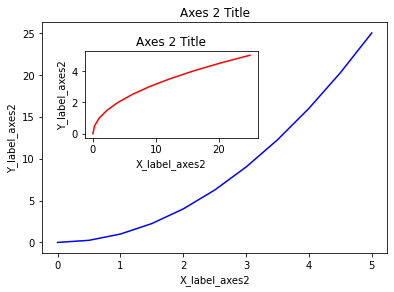

In [0]:
#Create a blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

#Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

#Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

The subplots() method

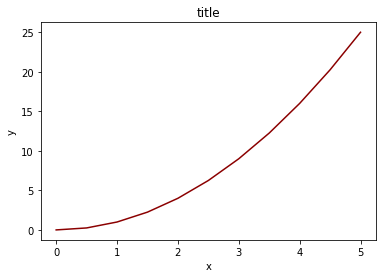

In [0]:
#Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1)

#Now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

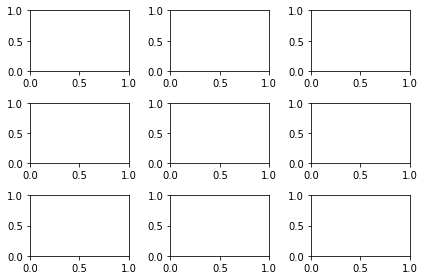

In [0]:
#Then you can specify the number of rows and columns when creating the subplots() object:
#Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=3, ncols=3)

fig
plt.tight_layout()

In [0]:
#Axes is an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17156d09b0>,
      dtype=object)

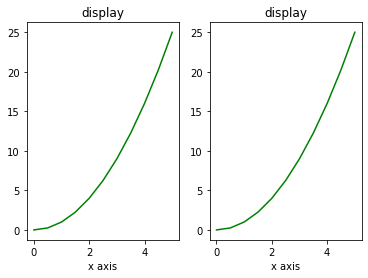

In [0]:
#We can iterate through this array:
fig, axes = plt.subplots(nrows=1, ncols=2)

#Display the figure object
for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x axis')
  ax.set_title('display')
plt;

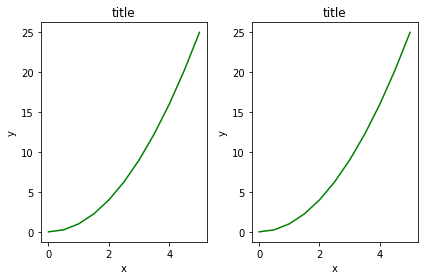

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')

fig
plt.tight_layout()



In [0]:
fig = plt.figure(figsize=(8, 4), dpi=100)

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'title')

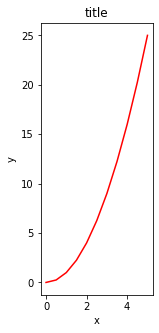

In [0]:
fig, axes = plt.subplots(figsize=(2, 5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

In [0]:
#To save a figure to a file we can use the savefig method in the Figure class:
fig.savefig('filename.png')

In [0]:
#Here we can also optionally specify the DPI and choose between different output formats:
fig.savefig('filename.jpg', dpi=200)

#Legends, labels and titles

In [0]:
#A title can be added to each axis instance in a figure. To set the title, use the set_title method in the axes instance:
ax.set_title('title');

In [0]:
#Axis labels
#Similarly, with the methods set_xlabel and set_ylabel, we can set the labels of the X and Y axes:
ax.set_xlabel('x')
ax.set_ylabel('y')

Text(227.80000000000004, 0.5, 'y')

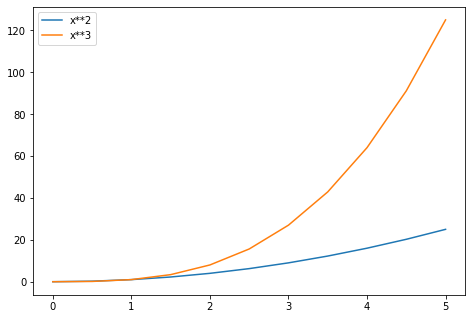

In [0]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])
ax
ax.plot(x, x**2, label='x**2')
ax.plot(x, x**3, label='x**3')
ax.legend();

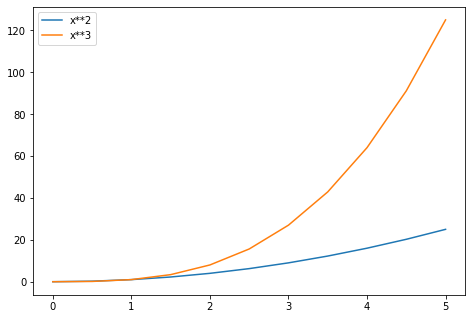

In [0]:
ax.legend(loc=1)
ax.legend(loc=2)
ax.legend(loc=3)
ax.legend(loc=4)

ax.legend()
fig

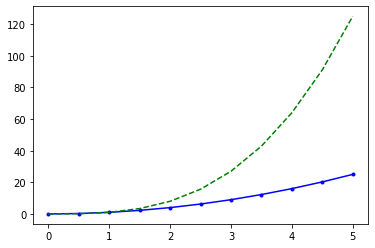

In [0]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

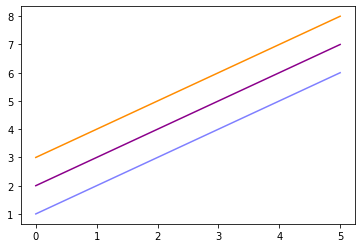

In [0]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

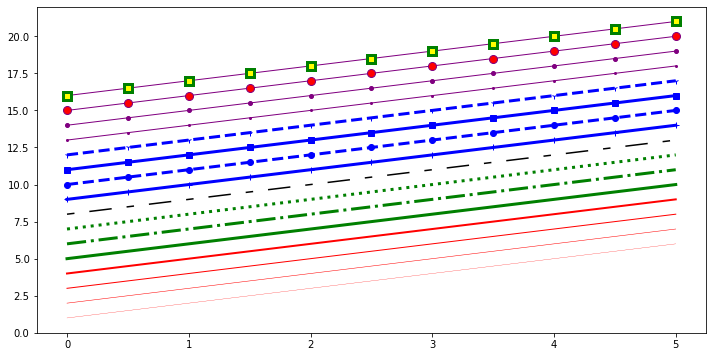

In [0]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

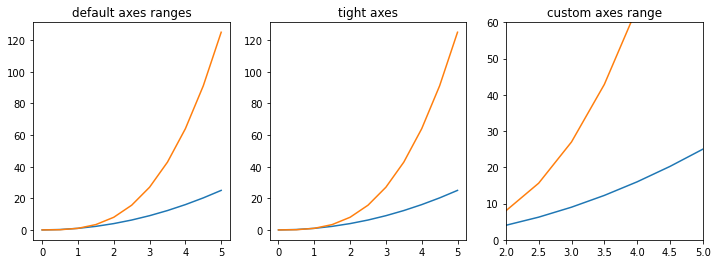

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

Imitate a real-world example

In [0]:
#example from FiveThirtyEight:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
 #Make fake prototypes
 #what styles are available in matplotlib? There's one for 538.
 print(plt.style.available[:5])
 plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']


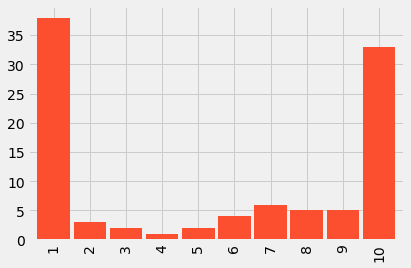

In [0]:
#Create fake data to replicate the blog post figure.
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                 index=range(1, 11))

fake.plot.bar(color='C1', width=0.9);

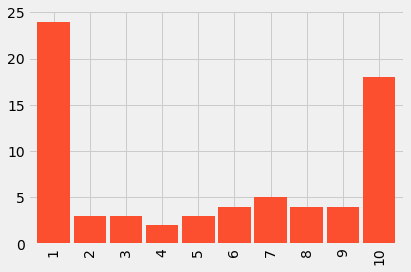

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

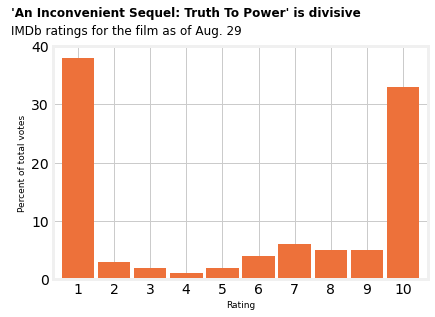

In [0]:
#Annotate with text
fig, ax = plt.subplots()
fig.patch.set(facecolor='white')

#Set the bars
fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor='white')

#Set the title and subtitle
ax.set_title(" 'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

#Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

#Fix the x and y axis tick marks and grid
ax.set_xticklabels(range(1, 11), rotation=0)
ax.set_yticklabels(range(0, 50, 10))
ax.set_yticks(range(0, 50, 10));

In [0]:
display(example)

Reproduce with real data

In [0]:
# read the data from 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
# Convert timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Use the timestamp as the unique index identifier 
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [0]:
# grab only the rows corresponding to the last day
lastday = df['2017-08-29']

In [0]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [0]:
# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


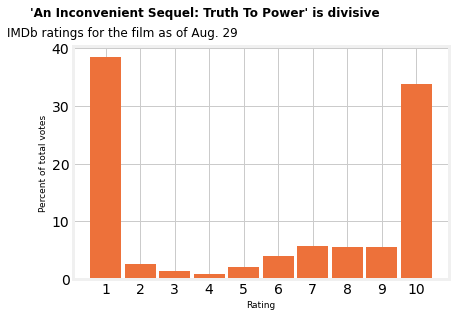

In [0]:
#Generate the figure
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2018/03/roeder-pepe-dankpepe1.png?w=1150'
example = Image(url=url, width=400)

display(example)

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=1150'
example = Image(url=url, width=400)

display(example)

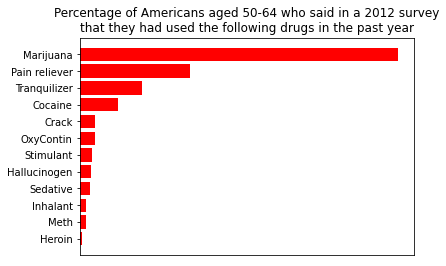

In [21]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make fake dataset
y = [0.05, 0.15, 0.15, 0.23, 0.25, 0.28, 0.36, 0.36, 0.87, 1.43, 2.52, 7.29]
height = [0.05, 0.15, 0.15, 0.23, 0.25, 0.28, 0.36, 0.36, 0.87, 1.43, 2.52, 7.29]
bars = ('Heroin', 'Meth', 'Inhalant', 'Sedative', 'Hallucinogen', 'Stimulant', 'OxyContin', 'Crack', 'Cocaine', 'Tranquilizer', 'Pain reliever', 'Marijuana')
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height, color='red')
#Title
plt.title("Percentage of Americans aged 50-64 who said in a 2012 survey\nthat they had used the following drugs in the past year")

#Hide the whole x axis 
plt.xticks([])
# Create names on the y-axis...This is the location of the values on the y axis.
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()
 


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here